In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.combine import SMOTEENN

In [127]:
df = pd.read_csv("data/synthetic_prostate_cancer_risk.csv")
df.shape

(1000, 13)

In [128]:
df.head()

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,1,39,24.7,No,NaN,Fatty,Moderate,No,High,5.6,No,No,Medium
1,2,43,25.6,Yes,NaN,Mixed,High,No,High,6.9,Yes,No,Low
2,3,72,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low
3,4,60,25.6,Yes,NaN,Fatty,Moderate,No,High,5.6,Yes,No,Medium
4,5,51,26.6,Yes,NaN,Mixed,Low,No,Medium,5.9,No,No,Medium


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   bmi                      1000 non-null   float64
 3   smoker                   1000 non-null   object 
 4   alcohol_consumption      605 non-null    object 
 5   diet_type                1000 non-null   object 
 6   physical_activity_level  1000 non-null   object 
 7   family_history           1000 non-null   object 
 8   mental_stress_level      1000 non-null   object 
 9   sleep_hours              1000 non-null   float64
 10  regular_health_checkup   1000 non-null   object 
 11  prostate_exam_done       1000 non-null   object 
 12  risk_level               1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [130]:
df.describe()

,id,age,bmi,sleep_hours
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.159000,26.003100,6.725500
std,288.819436,14.400107,3.012387,1.320948
min,1.000000,30.000000,17.700000,4.500000
25%,250.750000,43.000000,23.900000,5.600000
50%,500.500000,55.000000,26.000000,6.700000
75%,750.250000,68.000000,28.025000,7.900000
max,1000.000000,80.000000,36.800000,9.000000


## Data Cleaning

In [131]:
df.isna().sum() /len(df) * 100

id                          0.0
age                         0.0
bmi                         0.0
smoker                      0.0
alcohol_consumption        39.5
diet_type                   0.0
physical_activity_level     0.0
family_history              0.0
mental_stress_level         0.0
sleep_hours                 0.0
regular_health_checkup      0.0
prostate_exam_done          0.0
risk_level                  0.0
dtype: float64

In [132]:
df["alcohol_consumption"].unique()

array([nan, 'Moderate', 'High'], dtype=object)

In [133]:
df["alcohol_consumption"] = df["alcohol_consumption"].fillna("Low")
df["alcohol_consumption"].sample(10)

92         High
282         Low
376         Low
701        High
726    Moderate
616         Low
387         Low
479         Low
44          Low
867         Low
Name: alcohol_consumption, dtype: object

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df.sample(10)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
230,231,75,21.9,Yes,Low,Mixed,Low,No,Low,5.9,No,No,Medium
178,179,63,26.6,No,High,Mixed,Low,Yes,Medium,8.2,No,Yes,Medium
797,798,36,19.6,Yes,Low,Mixed,High,No,High,4.8,No,No,Medium
898,899,40,25.7,Yes,Low,Healthy,Low,No,Low,8.7,Yes,No,Low
769,770,78,31.7,No,High,Fatty,Low,No,High,5.5,Yes,Yes,Medium
125,126,46,29.4,Yes,Moderate,Mixed,Moderate,No,Low,5.2,No,No,Medium
81,82,68,29.9,No,Moderate,Fatty,Moderate,No,Low,8.7,No,Yes,Low
466,467,30,23.2,No,Moderate,Fatty,Moderate,No,Medium,6.9,No,No,Low
80,81,47,25.5,Yes,Moderate,Mixed,Moderate,No,Medium,8.0,No,No,Low
700,701,72,22.5,Yes,Low,Fatty,Moderate,No,Medium,6.1,No,Yes,Medium


## Smoker 
- 0 = No
- 1 = Yes

In [136]:
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
88,89,79,26.6,1,Low,Healthy,Low,No,Low,6.4,Yes,Yes,Low
850,851,61,23.6,1,Low,Healthy,Low,No,Low,8.6,No,Yes,Medium
788,789,43,30.7,0,Moderate,Fatty,Moderate,Yes,Medium,7.9,Yes,No,Low
870,871,36,29.2,1,Low,Mixed,High,No,Medium,5.8,Yes,No,Low
780,781,67,26.1,0,Moderate,Healthy,High,No,Low,5.4,Yes,No,Low


## Alcohol Consumption
- 0 = Low
- 1 = Moderate
- 2 = High

In [137]:
df["alcohol_consumption"] = df["alcohol_consumption"].map({"Low": 0, "Moderate": 1, "High": 2})

In [138]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
30,31,59,25.7,1,0,Mixed,Low,No,High,5.4,Yes,No,Medium
100,101,78,26.7,1,0,Mixed,Low,Yes,High,4.7,Yes,No,High
499,500,39,29.9,0,0,Fatty,Moderate,No,High,5.9,No,No,Medium
542,543,30,31.7,0,1,Mixed,High,No,Low,5.6,No,No,Low
165,166,42,29.3,1,0,Fatty,High,No,Medium,7.1,Yes,No,Low


## Diet Type
- 0 = Fatty
- 1 = Mixed
- 2 = Healthy

In [139]:
df["diet_type"].unique()

array(['Fatty', 'Mixed', 'Healthy'], dtype=object)

In [140]:
df["diet_type"] = df["diet_type"].map({"Fatty": 0, "Mixed": 1, "Healthy": 2})

In [141]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
824,825,47,26.9,0,1,0,Moderate,No,High,8.4,No,No,Low
667,668,51,22.2,0,1,1,Moderate,No,High,6.7,Yes,Yes,Low
533,534,62,25.8,1,0,2,Low,No,Medium,8.1,Yes,Yes,Low
306,307,51,24.4,1,0,2,Low,No,Medium,6.3,Yes,Yes,Low
698,699,68,26.8,1,0,2,Low,No,High,7.5,No,No,Medium


## Physical Activity Level
- 0 = Low
- 1 = Moderate
- 2 = High

In [142]:
df["physical_activity_level"].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [143]:
df["physical_activity_level"] = df["physical_activity_level"].map({"Low": 0, "Moderate": 1, "High": 2})

In [144]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
319,320,55,21.3,0,0,1,2,No,Medium,8.3,Yes,No,Low
965,966,45,26.8,0,1,2,1,No,High,5.1,Yes,No,Low
178,179,63,26.6,0,2,1,0,Yes,Medium,8.2,No,Yes,Medium
372,373,64,21.4,0,0,1,0,No,Low,5.4,Yes,No,Low
232,233,79,18.2,0,0,2,1,No,High,6.9,No,Yes,Low


## Family History
- 0 = No
- 1 = Yes

In [145]:
df["family_history"] = df["family_history"].map({"No": 0, "Yes": 1})

In [146]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
163,164,77,25.8,1,0,2,1,0,Medium,7.1,Yes,Yes,Low
395,396,55,26.0,0,0,0,0,0,Low,7.6,No,No,Medium
19,20,40,23.8,0,1,1,2,0,High,5.7,No,No,Low
257,258,76,26.7,1,1,1,0,1,High,6.6,Yes,No,Medium
638,639,65,27.7,0,0,2,2,1,Medium,5.7,Yes,Yes,Low


## Mental Stress Level
- 0 = Low
- 1 = Moderate
- 2 = High

In [147]:
df["mental_stress_level"] = df["mental_stress_level"].map({"Low": 0, "Medium": 1, "High": 2})

In [148]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
435,436,48,24.8,1,0,1,2,0,0,6.3,No,No,Low
33,34,44,28.9,1,2,1,1,0,2,8.4,No,No,Medium
587,588,66,26.4,1,0,0,1,0,0,6.8,No,No,Medium
817,818,58,24.7,0,2,2,2,0,0,8.2,No,Yes,Low
421,422,78,24.3,1,0,1,1,0,1,5.9,No,No,Medium


## Regular Health Checkup
- 0 = No
- 1 = Yes

In [149]:
df["regular_health_checkup"] = df["regular_health_checkup"].map({"No": 0, "Yes": 1})

In [150]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
49,50,66,22.1,0,0,0,1,0,2,8.1,1,No,Low
164,165,63,24.8,1,0,1,0,0,1,5.9,1,No,Medium
622,623,45,27.0,1,2,1,0,0,1,8.8,0,No,Medium
375,376,58,24.2,0,1,1,1,0,1,7.0,0,Yes,Low
773,774,43,27.8,0,0,2,2,0,0,8.8,1,No,Low


## Prostate Exam Done
- 0 = No
- 1 = Yes

In [151]:
df["prostate_exam_done"] = df["prostate_exam_done"].map({"No": 0, "Yes": 1})

In [152]:
df.sample(5)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
734,735,54,28.1,1,1,2,1,0,0,6.3,1,1,Low
383,384,30,27.9,0,1,0,0,0,0,4.8,1,0,Low
846,847,48,30.8,1,1,2,0,0,0,7.2,1,0,Low
970,971,41,25.5,0,2,2,1,0,1,5.3,0,0,Low
216,217,46,26.1,0,0,2,0,1,1,8.7,0,0,Medium


## Risk Level
- 0 = Low
- 1 = Medium
- 2 = High

In [153]:
df["risk_level"] = df["risk_level"].map({"Low": 0, "Medium": 1, "High": 2})

In [154]:
df.sample(10)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
688,689,36,26.5,0,1,1,0,0,2,7.2,0,0,0
678,679,67,23.0,0,1,1,0,0,2,4.8,1,1,0
338,339,38,30.4,1,1,0,1,0,2,5.1,0,0,1
923,924,56,20.0,0,0,0,2,0,1,5.5,1,1,0
278,279,59,23.6,1,2,2,2,0,0,8.7,0,1,1
298,299,75,27.4,1,0,1,0,0,1,4.6,0,1,1
154,155,63,26.9,0,1,1,0,0,1,6.5,1,1,0
563,564,37,27.4,0,0,2,1,0,1,6.1,0,0,0
610,611,75,25.4,0,0,0,2,0,1,8.4,1,1,0
147,148,59,25.9,0,0,1,2,1,0,7.9,1,1,0


In [155]:
df = df.drop("id", axis=1)
df.head()

,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,39,24.7,0,0,0,1,0,2,5.6,0,0,1
1,43,25.6,1,0,1,2,0,2,6.9,1,0,0
2,72,22.4,0,1,1,1,0,2,7.8,1,0,0
3,60,25.6,1,0,0,1,0,2,5.6,1,0,1
4,51,26.6,1,0,1,0,0,1,5.9,0,0,1


C:\Users\oktax\AppData\Local\Temp\ipykernel_3188\2342941634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risk_level', palette='Set2')


<Axes: xlabel='risk_level', ylabel='count'>

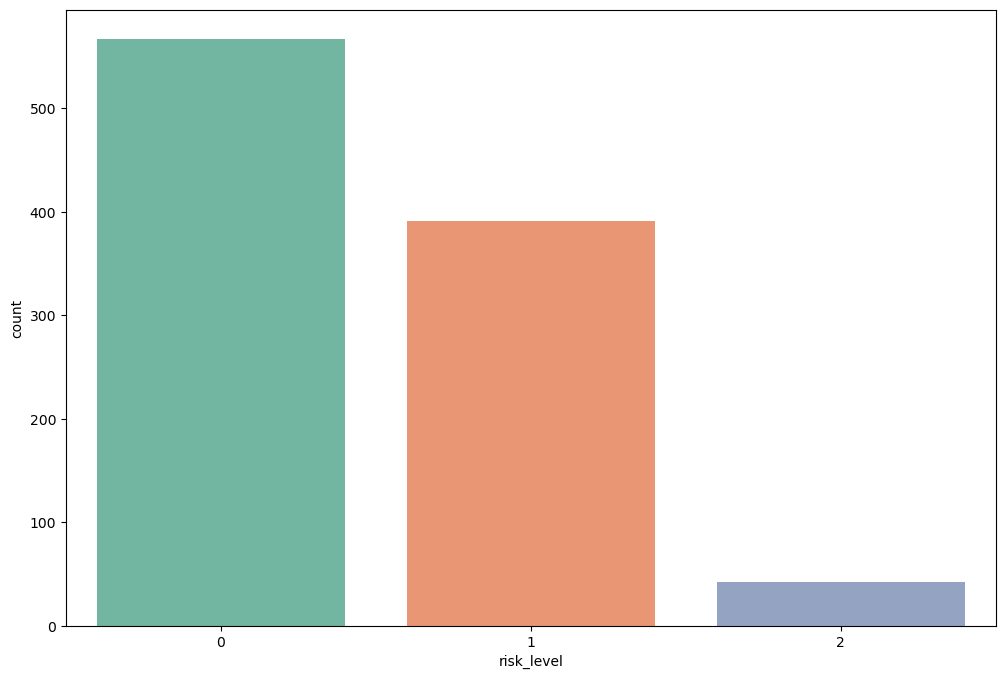

In [156]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='risk_level', palette='Set2')

<Axes: >

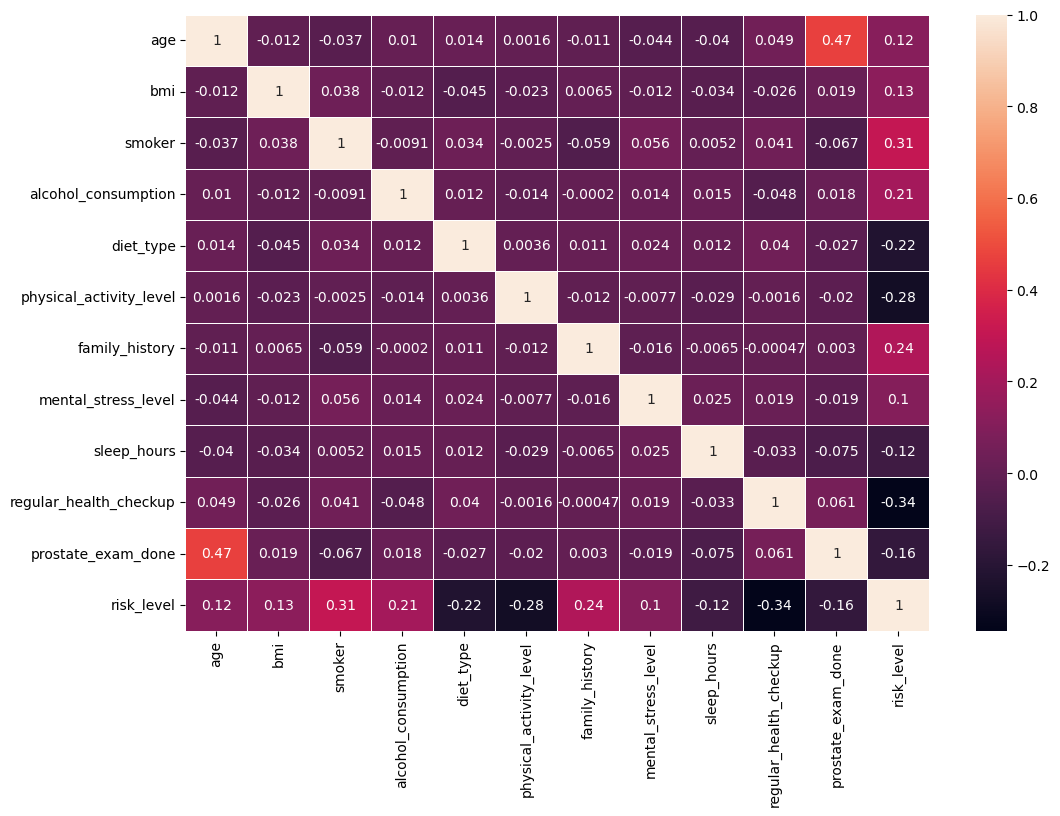

In [157]:
df_corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, linewidths=0.5)

Text(0, 0.5, 'Jumlah Pasien')

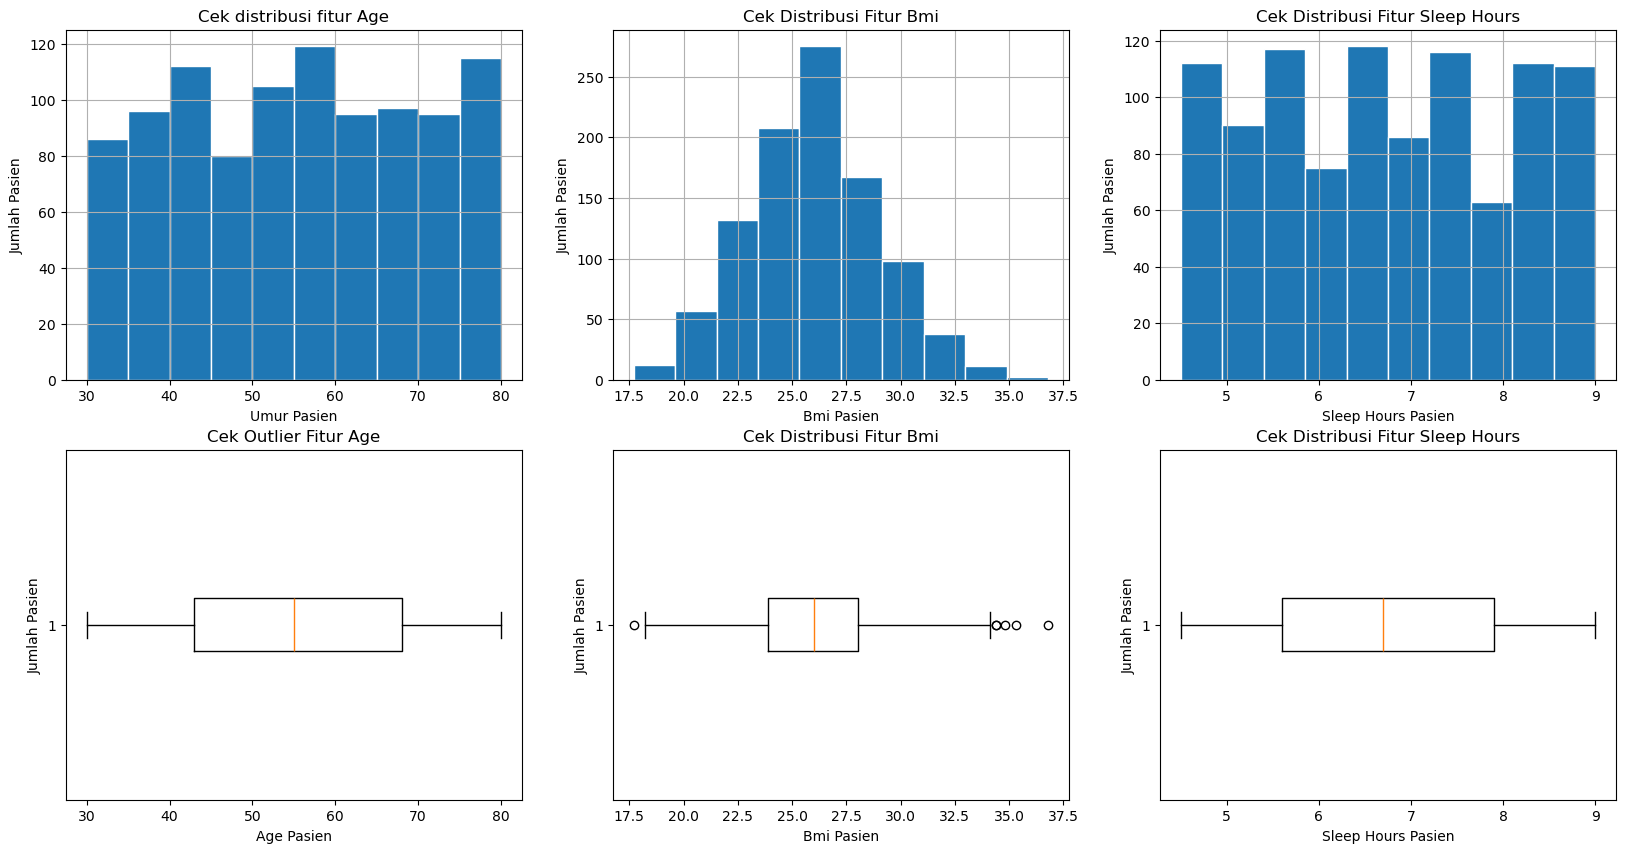

In [158]:
fig,axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0,0].hist(df["age"], edgecolor="white")
axs[0,0].set_title("Cek distribusi fitur Age")
axs[0,0].set_xlabel("Umur Pasien")
axs[0,0].set_ylabel("Jumlah Pasien")
axs[0,0].grid(True)

axs[0, 1].hist(df["bmi"], edgecolor="white")
axs[0, 1].set_title("Cek Distribusi Fitur Bmi")
axs[0, 1].set_xlabel("Bmi Pasien")
axs[0, 1].set_ylabel("Jumlah Pasien")
axs[0, 1].grid(True)

axs[0, 2].hist(df["sleep_hours"], edgecolor="white")
axs[0, 2].set_title("Cek Distribusi Fitur Sleep Hours")
axs[0, 2].set_xlabel("Sleep Hours Pasien")
axs[0, 2].set_ylabel("Jumlah Pasien")
axs[0, 2].grid(True)

axs[1, 0].boxplot(df["age"], vert=False)
axs[1, 0].set_title("Cek Outlier Fitur Age")
axs[1, 0].set_xlabel("Age Pasien")
axs[1, 0].set_ylabel("Jumlah Pasien")

axs[1, 1].boxplot(df["bmi"], vert=False)
axs[1, 1].set_title("Cek Distribusi Fitur Bmi")
axs[1, 1].set_xlabel("Bmi Pasien")
axs[1, 1].set_ylabel("Jumlah Pasien")

axs[1, 2].boxplot(df["sleep_hours"], vert=False)
axs[1, 2].set_title("Cek Distribusi Fitur Sleep Hours")
axs[1, 2].set_xlabel("Sleep Hours Pasien")
axs[1, 2].set_ylabel("Jumlah Pasien")

In [159]:
# Membuat sebuah fungsi untuk menangai outlier
def remove_outlier (df, columns, x):
    df_clean = df.copy()
    for cols in columns:
        Q1 = df_clean[cols].quantile(0.25)
        Q3 = df_clean[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - x * IQR
        upper_bound = Q3 + x * IQR
        df_clean = df_clean[(df_clean[cols] >= lower_bound) & (df_clean[cols] <= upper_bound)]
    return df_clean

In [160]:
df_numbers = df.select_dtypes(include=("int64", "float64")).columns.to_list()
df_no_outlier = remove_outlier(df, df_numbers, 1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x256851dbb80>,
 'caps': [<matplotlib.lines.Line2D at 0x256851f81c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x256851db9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x256851f87c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x256851f8ac0>],
 'means': []}

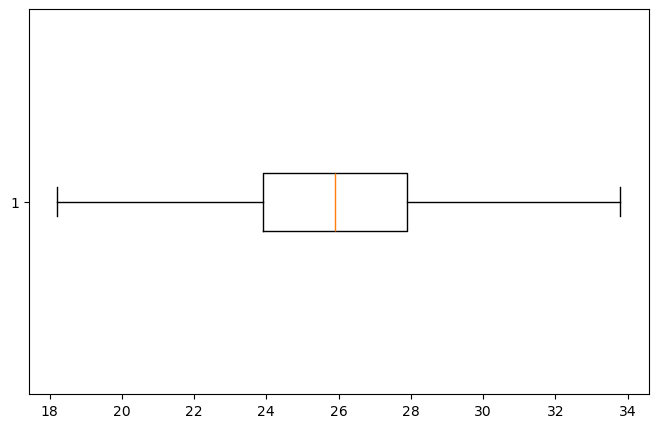

In [161]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_no_outlier["bmi"], vert=False)

In [162]:
df_no_outlier

,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,39,24.7,0,0,0,1,0,2,5.6,0,0,1
1,43,25.6,1,0,1,2,0,2,6.9,1,0,0
2,72,22.4,0,1,1,1,0,2,7.8,1,0,0
3,60,25.6,1,0,0,1,0,2,5.6,1,0,1
4,51,26.6,1,0,1,0,0,1,5.9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,73,24.5,1,1,2,0,0,0,5.0,0,0,1
996,42,25.5,0,0,2,1,0,2,8.1,1,0,0
997,47,32.4,0,1,0,2,0,0,7.6,0,0,0
998,54,25.8,0,2,1,1,0,2,6.5,1,0,0


In [163]:
model = RandomForestClassifier(random_state=42)

X = df_no_outlier.drop("risk_level", axis=1)
y = df_no_outlier["risk_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote_nn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_nn.fit_resample(X_train, y_train)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_resampled)
X_test_transform = std_scaler.transform(X_test)

cross_val = cross_val_score(estimator=model, X=X_train_scaled, y=y_resampled, cv=5, scoring="accuracy")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1 Macro):", grid_search.best_score_)

from sklearn.metrics import classification_report

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_transform)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (F1 Macro): 0.9468671613327586
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       101
           1       0.77      0.77      0.77        56
           2       0.38      0.60      0.46         5

    accuracy                           0.83       162
   macro avg       0.68      0.75      0.70       162
weighted avg       0.84      0.83      0.83       162



In [164]:
model.fit(X_train_scaled, y_resampled)

RandomForestClassifier(random_state=42)

In [165]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_transform)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       101
           1       0.70      0.77      0.74        56
           2       0.43      0.60      0.50         5

    accuracy                           0.81       162
   macro avg       0.68      0.74      0.70       162
weighted avg       0.82      0.81      0.81       162



In [166]:
model_lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

X = df_no_outlier.drop("risk_level", axis=1)
y = df_no_outlier["risk_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote_nn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_nn.fit_resample(X_train, y_train)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_resampled)
X_test_transform = std_scaler.transform(X_test)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(model_lr, param_grid, cv=5, scoring='f1_macro')

grid.fit(X_train_scaled, y_resampled)

print("Best Parameters:", grid.best_params_)
print("Best Score (F1 Macro):", grid.best_score_)


best_logreg = grid.best_estimator_
y_pred = best_logreg.predict(X_test_transform)

cross_val = cross_val_score(estimator=best_logreg, X=X_train_scaled, y=y_resampled, cv=5, scoring="accuracy")
print(classification_report(y_test, y_pred), cross_val)

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}
Best Score (F1 Macro): 0.852791674552579
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       101
           1       0.74      0.55      0.63        56
           2       0.44      0.80      0.57         5

    accuracy                           0.78       162
   macro avg       0.67      0.75      0.69       162
weighted avg       0.78      0.78      0.77       162
 [0.82876712 0.85517241 0.89655172 0.90344828 0.88965517]
